In [79]:
import os
import pandas as pd
# Mudança de diretório
os.chdir('C:\\Users\\samue\\Dropbox\\transito')

In [3]:
# Carregar o arquivo CSV
import pandas as pd
file_path = 'C:\\Users\\samue\\Dropbox\\transito\\receita\\bq-results-20240917-210801-1726607291554.csv'
data = pd.read_csv(file_path)

# Converter a coluna 'data' para o formato datetime e ordenar os dados pela data
data['data'] = pd.to_datetime(data['data'])
data_sorted = data.sort_values(by='data')

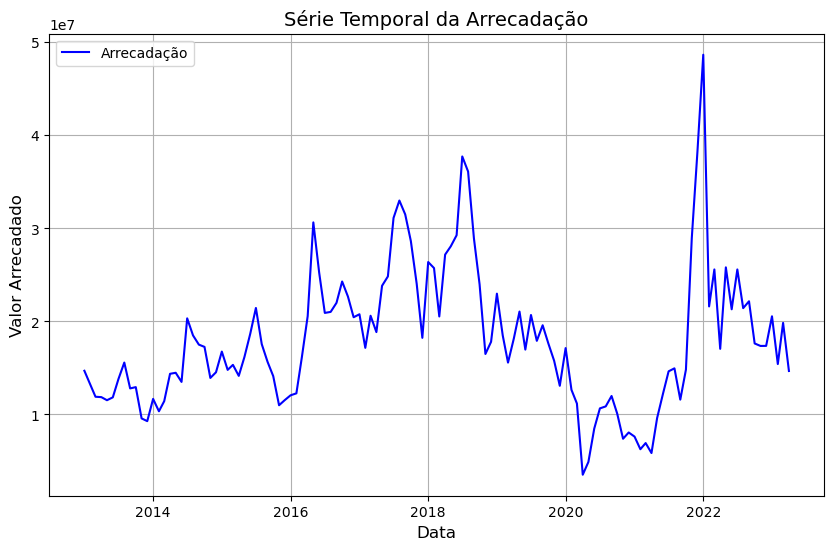

In [81]:
import matplotlib.pyplot as plt

# Plotar a série temporal de arrecadação ao longo do tempo
plt.figure(figsize=(10,6))
plt.plot(data_sorted['data'], data_sorted['valor_arrecadacao'], label='Arrecadação', color='b')

# Definir títulos e rótulos
plt.title('Série Temporal da Arrecadação', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor Arrecadado', fontsize=12)
plt.grid(True)
plt.legend()

# Exibir o gráfico
plt.show()


C:\Users\samue\AppData\Local\Temp\ipykernel_59252\151800246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['data_numeric'] = filtered_data['data'].map(pd.Timestamp.toordinal)
C:\Users\samue\AppData\Local\Temp\ipykernel_59252\151800246.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['predictions'] = linear_model.predict(X)


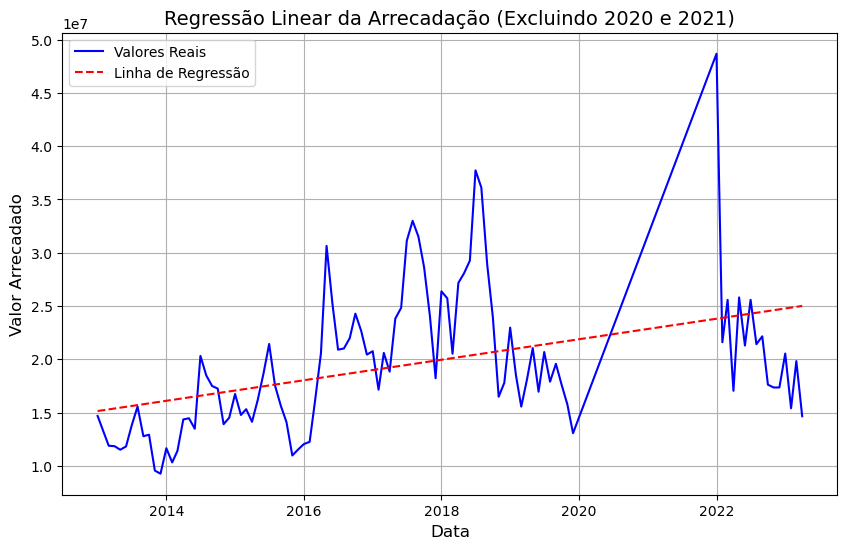

In [7]:
################################
## PRIMEIRA TENTATIVA - COVID ##
################################

# Filtrar os dados, excluindo os anos de 2020 e 2021
filtered_data = data_sorted[~data_sorted['ano'].isin([2020, 2021])]

# Definir as variáveis para a regressão: Data (como numérica) e Arrecadação
filtered_data['data_numeric'] = filtered_data['data'].map(pd.Timestamp.toordinal)
X = filtered_data[['data_numeric']]
y = filtered_data['valor_arrecadacao']

# Importar o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Ajustar o modelo de regressão linear simples
linear_model = LinearRegression()
linear_model.fit(X, y)

# Coeficientes da regressão
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# Predições da arrecadação
filtered_data['predictions'] = linear_model.predict(X)

# Plotar a linha de regressão com os dados
plt.figure(figsize=(10,6))
plt.plot(filtered_data['data'], filtered_data['valor_arrecadacao'], label='Valores Reais', color='b')
plt.plot(filtered_data['data'], filtered_data['predictions'], label='Linha de Regressão', color='r', linestyle='--')

# Definir títulos e rótulos
plt.title('Regressão Linear da Arrecadação (Excluindo 2020 e 2021)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor Arrecadado', fontsize=12)
plt.grid(True)
plt.legend()

# Exibir o gráfico
plt.show()


In [9]:
# Estatísticas descritivas por mês, convertendo valores para milhões e ajustando o nome das colunas
monthly_stats = data_sorted.groupby(data_sorted['data'].dt.month)['valor_arrecadacao'].agg(['mean', 'median', 'std', 'min', 'max']) / 1e6
monthly_stats = monthly_stats.round(2)  # Arredondar para 2 casas decimais
monthly_stats.columns = ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo']
monthly_stats.index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
# Exibir as estatísticas
print(monthly_stats)

           Média  Mediana  Desvio Padrão  Mínimo  Máximo
Janeiro    19.93    17.13          10.98    7.61   48.67
Fevereiro  15.27    14.79           5.38    6.26   25.73
Março      15.91    15.57           5.41    6.92   25.59
Abril      15.11    14.67           6.60    3.51   27.18
Maio       18.61    18.61           8.58    4.89   30.64
Junho      18.23    17.82           6.84    8.47   29.26
Julho      21.69    20.80           8.16   10.65   37.74
Agosto     20.69    18.20           7.94   10.86   36.11
Setembro   19.37    18.55           6.90   11.59   31.50
Outubro    18.14    17.44           5.80   10.08   28.63
Novembro   16.71    16.13           6.82    7.38   28.94
Dezembro   16.85    15.95           8.53    8.06   38.22


In [83]:
####################
# SERIES DE TEMPO #
###################
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL

# Definir o índice da série de arrecadação e incluir todos os anos
arrecadacao_full = data_sorted.set_index('data')['valor_arrecadacao']

# 1. Teste ADF (Teste de Dickey-Fuller) para verificar estacionariedade
result_adf = adfuller(arrecadacao_full)
print(f'Teste ADF: Estatística={result_adf[0]}, p-valor={result_adf[1]}')

Teste ADF: Estatística=-2.7626608303524978, p-valor=0.06380851889228836


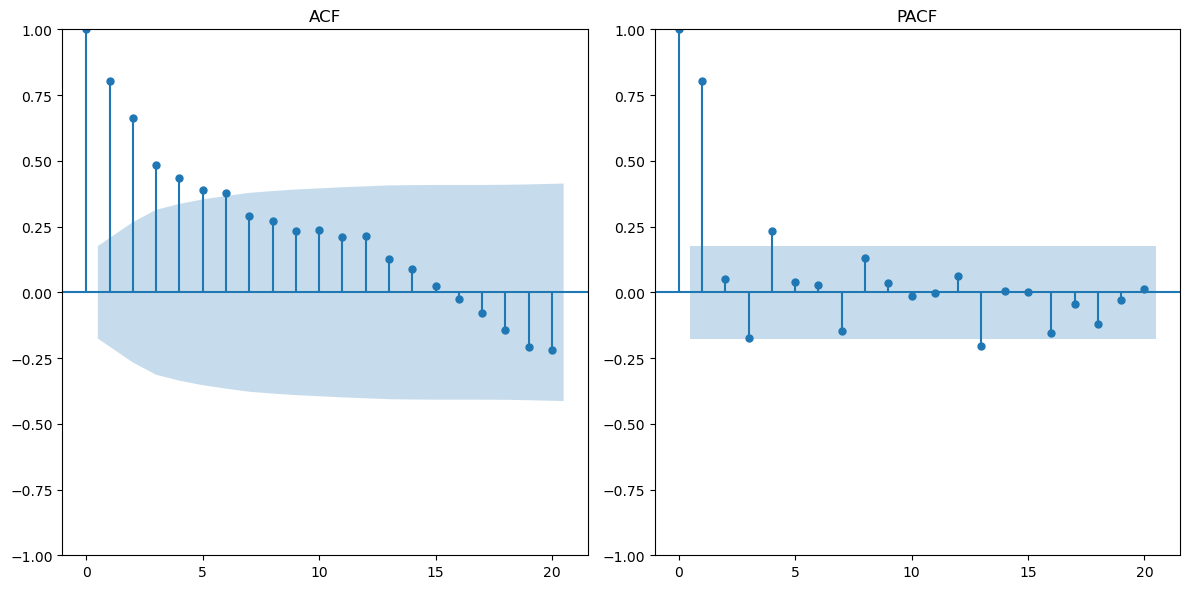

In [13]:
# 2. Função de Autocorrelação (ACF) e Autocorrelação Parcial (PACF)
plt.figure(figsize=(12,6))

# Gráfico ACF
plt.subplot(121)
plot_acf(arrecadacao_full, lags=20, ax=plt.gca())
plt.title('ACF')

# Gráfico PACF
plt.subplot(122)
plot_pacf(arrecadacao_full, lags=20, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()

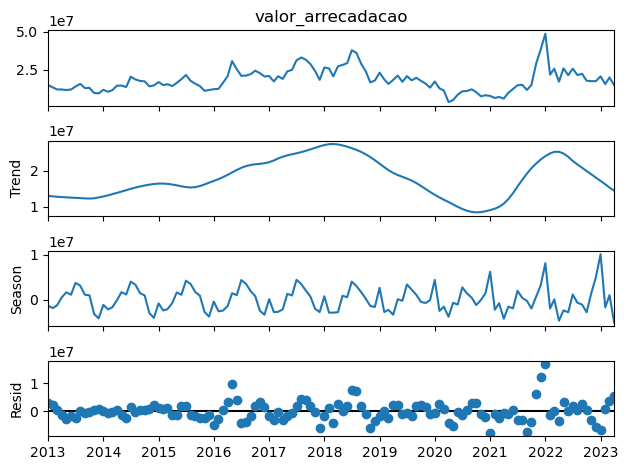

In [15]:
# 3. Verificar sazonalidade usando STL (Seasonal-Trend decomposition)
# Definir a frequência como mensal (início de mês)
arrecadacao_full = arrecadacao_full.asfreq('MS')

# Decompor a série usando o método STL
stl = STL(arrecadacao_full, seasonal=13)
result = stl.fit()

# Plotar os componentes da decomposição: tendência, sazonalidade e resíduos
result.plot()
plt.show()

In [17]:
# 4. Ajustar o modelo ARMA(1,1) após a análise de ACF e PACF
modelo_arma = ARIMA(arrecadacao_full, order=(1, 0, 1))
modelo_arma_fit = modelo_arma.fit()

# Exibir o resumo do modelo ajustado
print(modelo_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      valor_arrecadacao   No. Observations:                  124
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2072.907
Date:                Wed, 09 Oct 2024   AIC                           4153.813
Time:                        10:21:36   BIC                           4165.095
Sample:                    01-01-2013   HQIC                          4158.396
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.799e+07   1.57e-10   1.15e+17      0.000     1.8e+07     1.8e+07
ar.L1          0.8151      0.057     14.220      0.000       0.703       0.927
ma.L1         -0.0417      0.104     -0.403      0.6

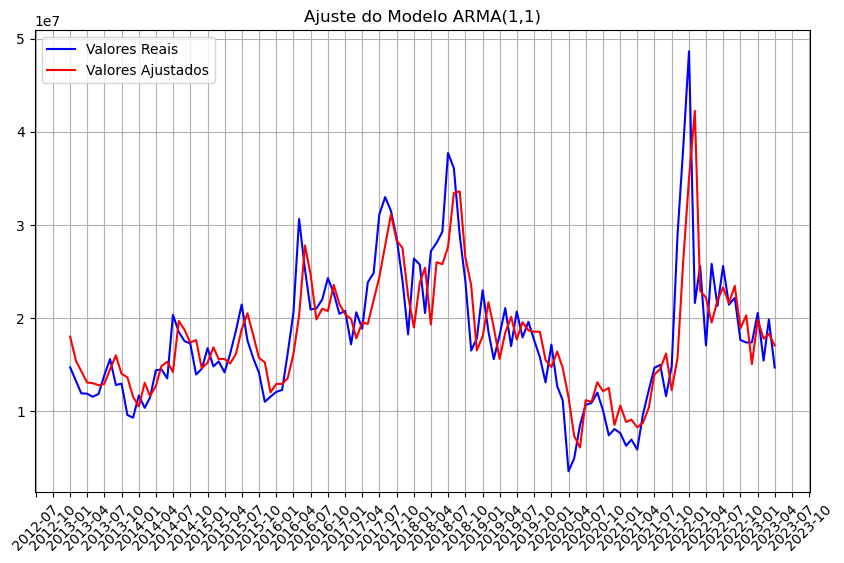

In [87]:
# Plotar a série original com os valores ajustados pelo modelo ARMA(1,1)
plt.figure(figsize=(10,6))
plt.plot(arrecadacao_full, label='Valores Reais', color='b')
plt.plot(modelo_arma_fit.fittedvalues, color='red', label='Valores Ajustados')
plt.title('Ajuste do Modelo ARMA(1,1)')

# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar grid ao gráfico
plt.grid(True)

plt.legend()
plt.show()

C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

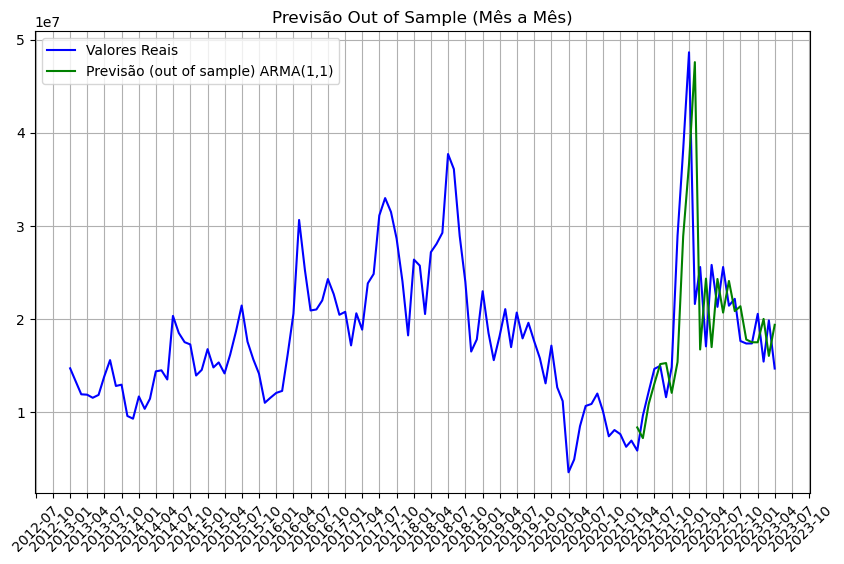

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Definir a série de previsões
predictions = []

# Definir o tamanho da janela de treino inicial (pode ser 80% dos dados, por exemplo)
train_size = int(len(arrecadacao_full) * 0.8)
train_data = arrecadacao_full[:train_size]
test_data = arrecadacao_full[train_size:]

# Inicializar os dados para a previsão rolling
rolling_train_data = train_data.copy()

# Fazer previsões iterativas para o período de teste
for t in range(len(test_data)):
    # Ajustar o modelo ARIMA(1,0,1) com base nos dados de treino atuais
    modelo_arima = ARIMA(rolling_train_data, order=(1, 0, 1))
    modelo_arima_fit = modelo_arima.fit()

    # Prever o valor do próximo mês
    forecast = modelo_arima_fit.forecast(steps=1).iloc[0]
    
    # Adicionar a previsão ao conjunto de previsões
    predictions.append(forecast)

    # Adicionar o valor real do teste ao conjunto de treino (usando pd.concat)
    rolling_train_data = pd.concat([rolling_train_data, test_data.iloc[t:t+1]])

# Converter previsões para numpy array para facilitar a plotagem
predictions = np.array(predictions)

# Plotar a série original e as previsões
plt.figure(figsize=(10,6))

# Usar o índice de datas
dates = arrecadacao_full.index

# Plotar a série completa de valores reais
plt.plot(dates, arrecadacao_full, label='Valores Reais', color='b')

# Plotar as previsões para o período de teste
plt.plot(dates[train_size:], predictions, color='green', label='Previsão (out of sample) ARMA(1,1)')

# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar grid ao gráfico
plt.grid(True)

plt.title('Previsão Out of Sample (Mês a Mês)')
plt.legend()
plt.show()

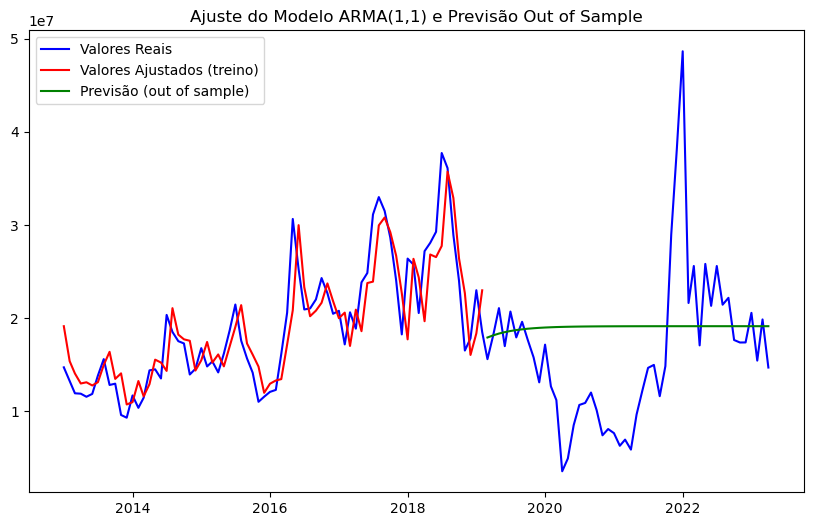

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Dividir os dados em conjunto de treino e teste
train_size = int(len(arrecadacao_full) * 0.6)  # Exemplo: 60% treino e 20% teste
train_data = arrecadacao_full[:train_size]
test_data = arrecadacao_full[train_size:]

# Ajustar o modelo ARMA(1,1) ao conjunto de treino
modelo_arma = ARIMA(train_data, order=(1, 0, 1))
modelo_arma_fit = modelo_arma.fit()

# Fazer previsões para o conjunto de teste
forecast = modelo_arma_fit.forecast(steps=len(test_data))

# Plotar a série original, os valores ajustados e a previsão out of sample
plt.figure(figsize=(10,6))

# Usar o índice de datas para as previsões e valores ajustados
dates = arrecadacao_full.index

# Série completa
plt.plot(dates, arrecadacao_full, label='Valores Reais', color='b')

# Valores ajustados pelo modelo no conjunto de treino (usando as datas do treino)
plt.plot(dates[:train_size], modelo_arma_fit.fittedvalues, color='red', label='Valores Ajustados (treino)')

# Previsões out of sample (usando as datas do teste)
plt.plot(dates[train_size:], forecast, color='green', label='Previsão (out of sample)')

plt.title('Ajuste do Modelo ARMA(1,1) e Previsão Out of Sample')
plt.legend()
plt.show()


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar o modelo SARIMA(1, 0, 1) x (1, 1, 1, 12)
modelo_sarima = SARIMAX(arrecadacao_full, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
modelo_sarima_fit = modelo_sarima.fit()

# Exibir o resumo do modelo ajustado
print(modelo_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  valor_arrecadacao   No. Observations:                  124
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1880.993
Date:                            Wed, 09 Oct 2024   AIC                           3771.985
Time:                                    10:22:35   BIC                           3785.578
Sample:                                01-01-2013   HQIC                          3777.500
                                     - 04-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8729      0.061     14.353      0.000       0.754       0.992
ma.L1          0.0165      0.123   

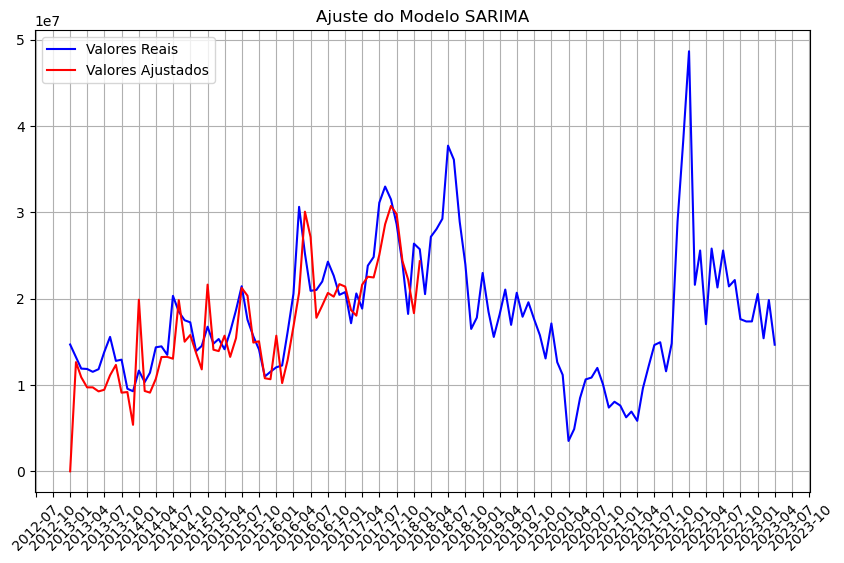

In [93]:
# Plotar a série original com os valores ajustados pelo modelo SARIMA
plt.figure(figsize=(10,6))
plt.plot(arrecadacao_full, label='Valores Reais', color='b')
plt.plot(modelo_sarima_fit.fittedvalues, color='red', label='Valores Ajustados')
plt.title('Ajuste do Modelo SARIMA')
plt.legend()
# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar grid ao gráfico
plt.grid(True)
plt.show()

C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

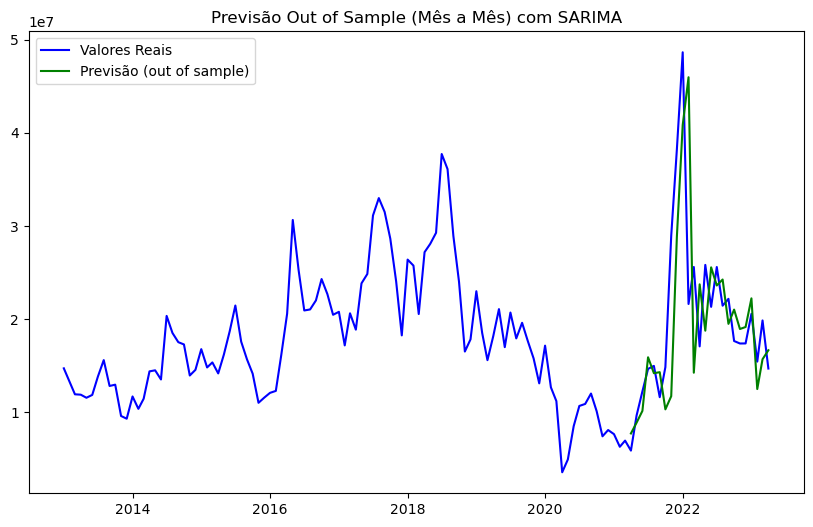

C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                  valor_arrecadacao   No. Observations:                  124
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1880.993
Date:                            Wed, 09 Oct 2024   AIC                           3771.985
Time:                                    10:49:17   BIC                           3785.578
Sample:                                01-01-2013   HQIC                          3777.500
                                     - 04-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8729      0.061     14.353      0.000       0.754       0.992
ma.L1          0.0165      0.123   

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definir a série de previsões
predictions = []

# Definir o tamanho da janela de treino inicial (pode ser 80% dos dados, por exemplo)
train_size = int(len(arrecadacao_full) * 0.8)
train_data = arrecadacao_full[:train_size]
test_data = arrecadacao_full[train_size:]

# Inicializar os dados para a previsão rolling
rolling_train_data = train_data.copy()

# Fazer previsões iterativas para o período de teste usando o modelo SARIMA
for t in range(len(test_data)):
    # Ajustar o modelo SARIMA(1,0,1)x(1,1,1,12) com base nos dados de treino atuais
    modelo_sarima = SARIMAX(rolling_train_data, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
    modelo_sarima_fit = modelo_sarima.fit(disp=False)

    # Prever o valor do próximo mês
    forecast = modelo_sarima_fit.forecast(steps=1).iloc[0]
    
    # Adicionar a previsão ao conjunto de previsões
    predictions.append(forecast)

    # Adicionar o valor real do teste ao conjunto de treino (usando pd.concat)
    rolling_train_data = pd.concat([rolling_train_data, test_data.iloc[t:t+1]])

# Converter previsões para numpy array para facilitar a plotagem
predictions = np.array(predictions)

# Plotar a série original e as previsões
plt.figure(figsize=(10,6))

# Usar o índice de datas
dates = arrecadacao_full.index

# Plotar a série completa de valores reais
plt.plot(dates, arrecadacao_full, label='Valores Reais', color='b')

# Plotar as previsões para o período de teste
plt.plot(dates[train_size:], predictions, color='green', label='Previsão (out of sample)')

plt.title('Previsão Out of Sample (Mês a Mês) com SARIMA')

plt.legend()
plt.show()

# Ajustar o modelo SARIMA para a série completa e exibir o resumo
modelo_sarima_completo = SARIMAX(arrecadacao_full, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
modelo_sarima_fit_completo = modelo_sarima_completo.fit()

# Exibir o resumo do modelo ajustado para a série completa
print(modelo_sarima_fit_completo.summary())


C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


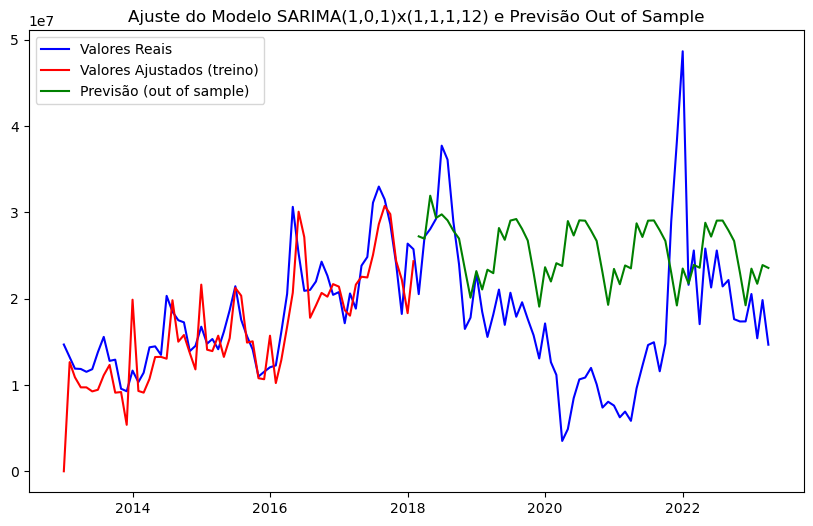

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Dividir os dados em conjunto de treino e teste
train_size = int(len(arrecadacao_full) * 0.5)  # Exemplo: 60% treino e 40% teste
train_data = arrecadacao_full[:train_size]
test_data = arrecadacao_full[train_size:]

# Ajustar o modelo SARIMA(1,0,1)x(1,1,1,12) ao conjunto de treino
modelo_sarima = SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
modelo_sarima_fit = modelo_sarima.fit(disp=False)

# Fazer previsões para o conjunto de teste
forecast = modelo_sarima_fit.forecast(steps=len(test_data))

# Plotar a série original, os valores ajustados e a previsão out of sample
plt.figure(figsize=(10,6))

# Usar o índice de datas para as previsões e valores ajustados
dates = arrecadacao_full.index

# Série completa
plt.plot(dates, arrecadacao_full, label='Valores Reais', color='b')

# Valores ajustados pelo modelo no conjunto de treino (usando as datas do treino)
plt.plot(dates[:train_size], modelo_sarima_fit.fittedvalues, color='red', label='Valores Ajustados (treino)')

# Previsões out of sample (usando as datas do teste)
plt.plot(dates[train_size:], forecast, color='green', label='Previsão (out of sample)')

plt.title('Ajuste do Modelo SARIMA(1,0,1)x(1,1,1,12) e Previsão Out of Sample')
plt.legend()
plt.show()


In [33]:
# 4. Ajustar o modelo ARMA(1,1) após a análise de ACF e PACF
modelo_arma = ARIMA(arrecadacao_full, order=(2, 0, 1))
modelo_arma_fit = modelo_arma.fit()

# Exibir o resumo do modelo ajustado
print(modelo_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      valor_arrecadacao   No. Observations:                  124
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2068.182
Date:                Wed, 09 Oct 2024   AIC                           4146.364
Time:                        10:23:10   BIC                           4160.465
Sample:                    01-01-2013   HQIC                          4152.092
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.799e+07   8.97e-10   2.01e+16      0.000     1.8e+07     1.8e+07
ar.L1         -0.1681      0.048     -3.534      0.000      -0.261      -0.075
ar.L2          0.8175      0.044     18.444      0.0

C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


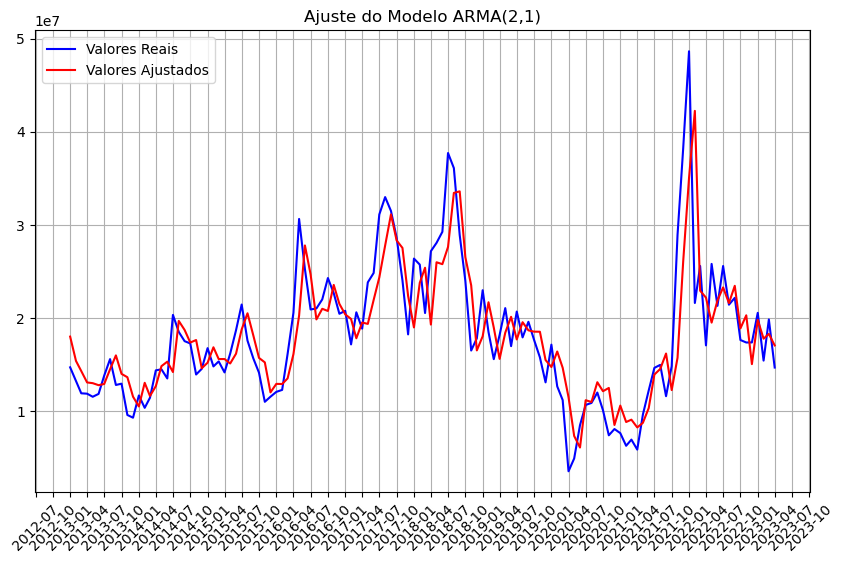

In [105]:
# Plotar a série original com os valores ajustados pelo modelo ARMA(1,1)
plt.figure(figsize=(10,6))
plt.plot(arrecadacao_full, label='Valores Reais', color='b')
plt.plot(modelo_arma_fit.fittedvalues, color='red', label='Valores Ajustados')
plt.title('Ajuste do Modelo ARMA(2,1)')
# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar grid ao gráfico
plt.grid(True)
plt.legend()
plt.show()

C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

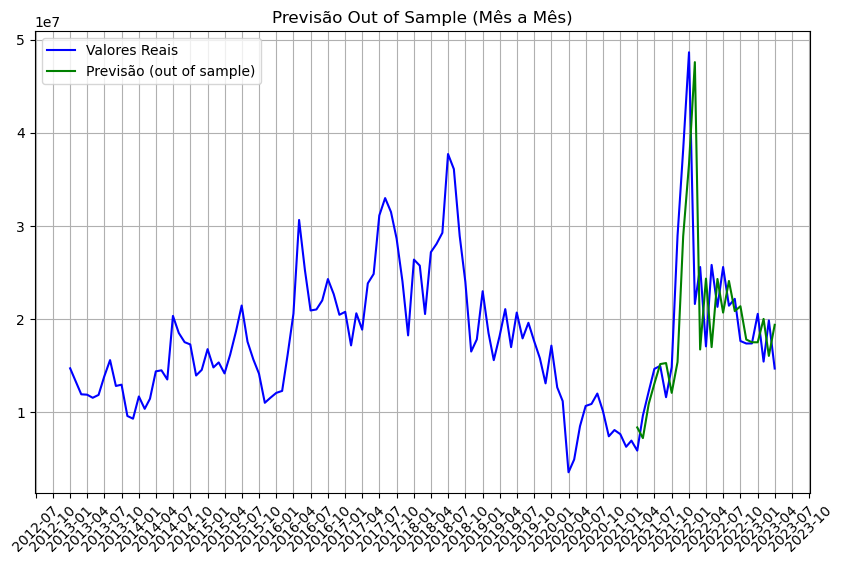

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Definir a série de previsões
predictions = []

# Definir o tamanho da janela de treino inicial (pode ser 80% dos dados, por exemplo)
train_size = int(len(arrecadacao_full) * 0.8)
train_data = arrecadacao_full[:train_size]
test_data = arrecadacao_full[train_size:]

# Inicializar os dados para a previsão rolling
rolling_train_data = train_data.copy()

# Fazer previsões iterativas para o período de teste
for t in range(len(test_data)):
    # Ajustar o modelo ARIMA(1,0,1) com base nos dados de treino atuais
    modelo_arima = ARIMA(rolling_train_data, order=(1, 0, 1))
    modelo_arima_fit = modelo_arima.fit()

    # Prever o valor do próximo mês
    forecast = modelo_arima_fit.forecast(steps=1).iloc[0]
    
    # Adicionar a previsão ao conjunto de previsões
    predictions.append(forecast)

    # Adicionar o valor real do teste ao conjunto de treino (usando pd.concat)
    rolling_train_data = pd.concat([rolling_train_data, test_data.iloc[t:t+1]])

# Converter previsões para numpy array para facilitar a plotagem
predictions = np.array(predictions)

# Plotar a série original e as previsões
plt.figure(figsize=(10,6))

# Usar o índice de datas
dates = arrecadacao_full.index

# Plotar a série completa de valores reais
plt.plot(dates, arrecadacao_full, label='Valores Reais', color='b')

# Plotar as previsões para o período de teste
plt.plot(dates[train_size:], predictions, color='green', label='Previsão (out of sample)')

plt.title('Previsão Out of Sample (Mês a Mês)')
# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar grid ao gráfico
plt.grid(True)
plt.legend()
plt.show()

AIC ARMA(1,1): 4146.363964473171
AIC SARIMA(1,0,1)(1,1,1)[12]: 3739.251247511705


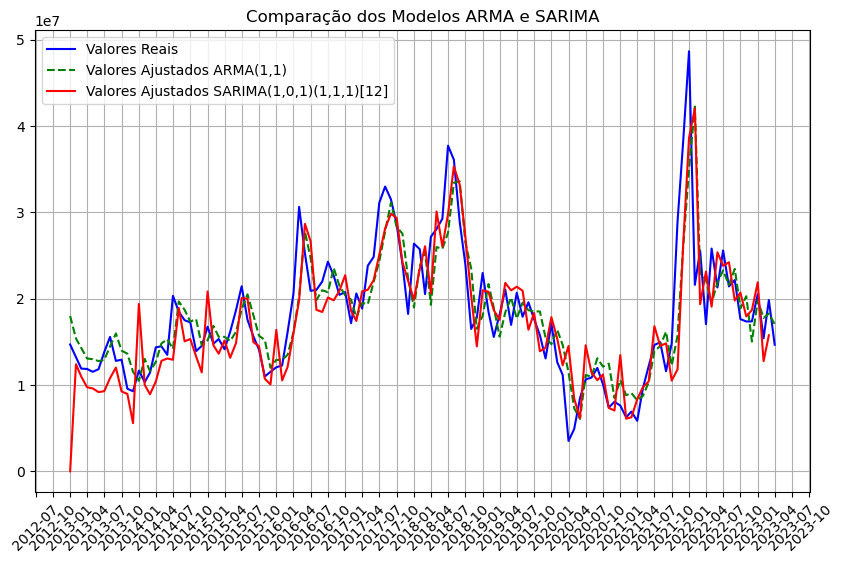

In [109]:
# Comparar os valores de AIC entre ARMA e SARIMA
aic_arma = modelo_arma_fit.aic
aic_sarima = modelo_sarima_fit.aic
print(f"AIC ARMA(1,1): {aic_arma}")
print(f"AIC SARIMA(1,0,1)(1,1,1)[12]: {aic_sarima}")

# Plotar a série original com os valores ajustados pelos dois modelos
plt.figure(figsize=(10,6))
plt.plot(arrecadacao_full, label='Valores Reais', color='b')
plt.plot(modelo_arma_fit.fittedvalues, color='green', label='Valores Ajustados ARMA(1,1)', linestyle='--')
plt.plot(modelo_sarima_fit.fittedvalues, color='red', label='Valores Ajustados SARIMA(1,0,1)(1,1,1)[12]')
# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar grid ao gráfico
plt.grid(True)
plt.title('Comparação dos Modelos ARMA e SARIMA')
plt.legend()
plt.show()

In [229]:
#################################
# INCLUINDO VARIAVEIS EXOGENAS #
################################
file_path = 'C:\\Users\\samue\\Dropbox\\transito\\pib_mensal.csv'

# Leitura do dataset 'pib', indicando que não há cabeçalho na primeira linha (header=None)
pib = pd.read_csv(file_path, header=None)

# Renomear a primeira coluna como 'data' e a segunda como 'pib'
pib.columns = ['data', 'pib']
pib


,data,pib
0,1990.01,"2,000"
1,1990.02,"4,000"
2,1990.03,"8,000"
3,1990.04,"7,000"
4,1990.05,"8,000"
...,...,...
411,2024.04,"974.631,8000"
412,2024.05,"949.511,1000"
413,2024.06,"963.507,5000"
414,2024.07,"996.770,2000"


,date,Óbitos totais,Novos óbitos,Novos óbitos - média móvel de 7 dias
0,2020-03-06,0,0,NaN
1,2020-03-07,0,0,NaN
2,2020-03-08,0,0,NaN
3,2020-03-09,0,0,NaN
4,2020-03-10,0,0,NaN
...,...,...,...,...
1103,2023-03-14,38092,0,3.714286
1104,2023-03-15,38092,0,3.714286
1105,2023-03-16,38092,0,3.714286
1106,2023-03-17,38092,0,3.714286


In [247]:
monthly_mean_deaths_df


,data,mean_novos_obitos
0,2020-03,0.692308
1,2020-04,17.233333
2,2020-05,98.161290
3,2020-06,99.066667
4,2020-07,56.774194
5,2020-08,43.645161
6,2020-09,43.533333
7,2020-10,37.290323
8,2020-11,39.000000
9,2020-12,50.483871


,data,veiculos
0,2013-01-01,311.453
1,2013-02-01,235.109
2,2013-03-01,283.912
3,2013-04-01,333.738
4,2013-05-01,316.233
...,...,...
139,2024-08-01,237.382
140,2024-09-01,236.334
141,2024-10-01,0.000
142,2024-11-01,0.000


In [251]:
pib['pib'] = pib['pib'].str.replace(',', '').astype(float)

# Para converter as datas corretamente, vamos garantir que estamos tratando as strings corretamente
# Primeiro, verificar se os valores de 'data' estão no formato correto
pib['data'] = pib['data'].astype(str)

# Agora converter para o formato datetime usando o formato correto
pib['data'] = pd.to_datetime(pib['data'], format='%Y.%m')


In [133]:
merged_data = pd.merge(pib, data, on='data', how='inner')

merged_data['percentual_pib'] = merged_data['pib'].pct_change() * 100
merged_data['percentual_arrecadacao'] = merged_data['valor_arrecadacao'].pct_change() * 100

# Adicionar a variável lag de delta_arrecadacao (mês anterior)
merged_data['lag_delta_arrecadacao'] = merged_data['percentual_arrecadacao'].shift(1)

# Criar dummies para o mês
merged_data = pd.get_dummies(merged_data, columns=['mes'], drop_first=True)

# Remover valores NaN resultantes do cálculo da variação percentual e do lag
merged_data.dropna(subset=['percentual_pib', 'percentual_arrecadacao', 'lag_delta_arrecadacao'], inplace=True)

merged_data = merged_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Certificar-se de que as colunas estão no formato numérico
# Isso garante que não existam valores como strings ou objetos
merged_data['percentual_pib'] = pd.to_numeric(merged_data['percentual_pib'], errors='coerce')
merged_data['percentual_arrecadacao'] = pd.to_numeric(merged_data['percentual_arrecadacao'], errors='coerce')
merged_data['lag_delta_arrecadacao'] = pd.to_numeric(merged_data['lag_delta_arrecadacao'], errors='coerce')

# Verificar se todas as dummies são numéricas
for col in merged_data.columns:
    if 'mes_' in col:
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Remover linhas com qualquer valor NaN nas colunas de interesse
merged_data.dropna(inplace=True)

# Definir as variáveis independentes (X) e dependente (y)
X = merged_data[['percentual_pib', 'lag_delta_arrecadacao'] + [col for col in merged_data.columns if 'mes_' in col]]
y = merged_data['percentual_arrecadacao']

C:\Users\samue\AppData\Local\Temp\ipykernel_59252\1864166054.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_data = merged_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [135]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     percentual_arrecadacao   R-squared:                       0.137
Model:                                OLS   Adj. R-squared:                  0.043
Method:                     Least Squares   F-statistic:                     1.458
Date:                    Wed, 09 Oct 2024   Prob (F-statistic):              0.151
Time:                            11:05:35   Log-Likelihood:                -611.89
No. Observations:                     123   AIC:                             1250.
Df Residuals:                         110   BIC:                             1286.
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [137]:
merged_data["predicted"]=model.fittedvalues

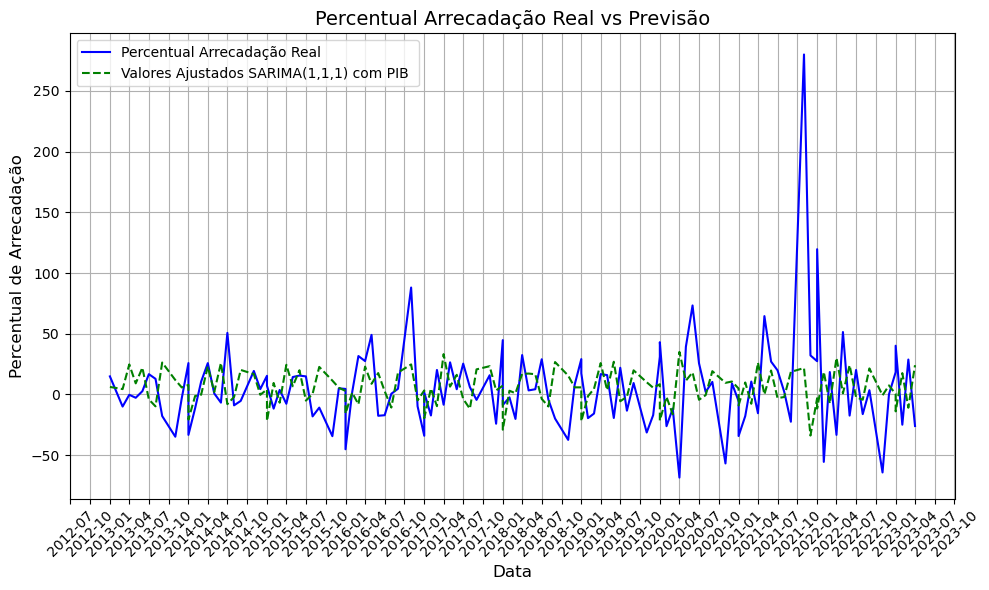

In [139]:
# Ordenar o dataframe pela coluna 'data' antes de plotar
merged_data_sorted = merged_data.sort_values(by='data')

# Plotar a série percentual de arrecadação real e a previsão com os dados ordenados
plt.figure(figsize=(10, 6))
plt.plot(merged_data_sorted['data'], merged_data_sorted['percentual_arrecadacao'], label='Percentual Arrecadação Real', color='blue')
plt.plot(merged_data_sorted['data'],model.fittedvalues, color='green', label='Valores Ajustados SARIMA(1,1,1) com PIB ', linestyle='--')

# Título e labels
plt.title('Percentual Arrecadação Real vs Previsão', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Percentual de Arrecadação', fontsize=12)

# Adicionar legenda
plt.legend()

# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês

# Adicionar grid ao gráfico
plt.grid(True)

# Ajustar os rótulos do eixo x
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [141]:
import numpy as np
idx_max = merged_data['percentual_arrecadacao'].idxmax()

# Verificar se não é o primeiro ou último valor para evitar erros
if 0 < idx_max < len(data_sorted) - 1:
    # Calcular a média entre o valor anterior e o seguinte
    media_vizinhanca = (merged_data['percentual_arrecadacao'].iloc[idx_max - 1] + 
                        merged_data['percentual_arrecadacao'].iloc[idx_max + 1]) / 2
    
    # Substituir o valor máximo pela média
    merged_data.at[idx_max, 'percentual_arrecadacao'] = media_vizinhanca



In [143]:
merged_data['lag_delta_arrecadacao'] = merged_data['percentual_arrecadacao'].shift(1)
merged_data['lag2_delta_arrecadacao'] = merged_data['percentual_arrecadacao'].shift(2)
merged_data=merged_data[2:]

X = merged_data[['percentual_pib', 'lag_delta_arrecadacao','lag2_delta_arrecadacao'] + [col for col in merged_data.columns if 'mes_' in col]]
y = merged_data['percentual_arrecadacao']

# Adicionar constante (intercepto)
X = sm.add_constant(X)

# Rodar a regressão
model = sm.OLS(y, X).fit()

# Exibir os resultados da regressão
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     percentual_arrecadacao   R-squared:                       0.293
Model:                                OLS   Adj. R-squared:                  0.207
Method:                     Least Squares   F-statistic:                     3.411
Date:                    Wed, 09 Oct 2024   Prob (F-statistic):           0.000205
Time:                            11:06:12   Log-Likelihood:                -556.44
No. Observations:                     121   AIC:                             1141.
Df Residuals:                         107   BIC:                             1180.
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

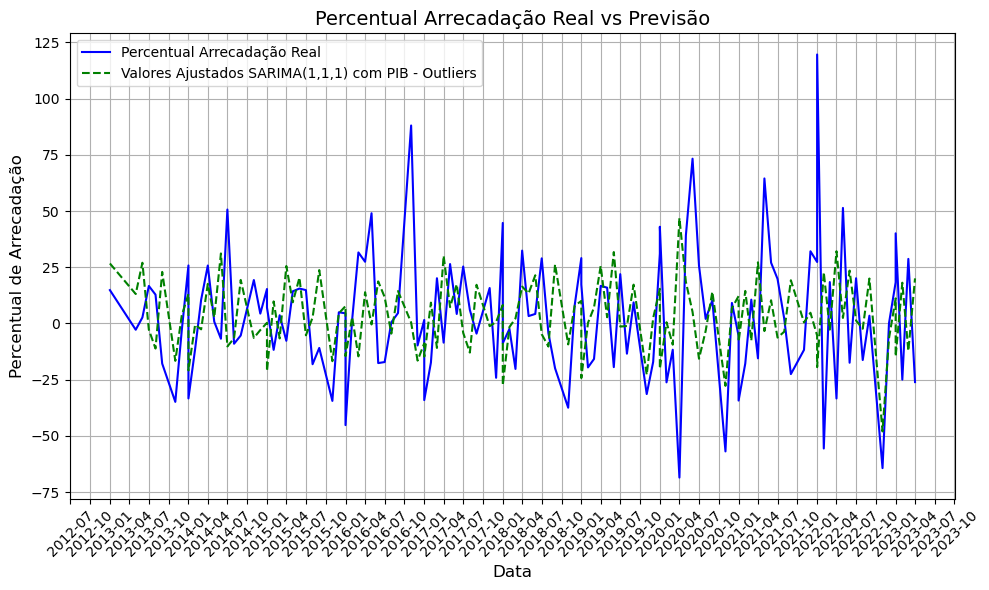

In [145]:
import matplotlib.dates as mdates
merged_data["predicted"]=model.fittedvalues
# Ordenar o dataframe pela coluna 'data' antes de plotar
merged_data_sorted = merged_data.sort_values(by='data')

# Plotar a série percentual de arrecadação real e a previsão com os dados ordenados
plt.figure(figsize=(10, 6))
plt.plot(merged_data_sorted['data'], merged_data_sorted['percentual_arrecadacao'], label='Percentual Arrecadação Real', color='blue')
plt.plot(merged_data_sorted['data'],model.fittedvalues, color='green', label='Valores Ajustados SARIMA(1,1,1) com PIB - Outliers', linestyle='--')

# Título e labels
plt.title('Percentual Arrecadação Real vs Previsão', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Percentual de Arrecadação', fontsize=12)

# Adicionar legenda
plt.legend()

# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês


# Adicionar grid ao gráfico
plt.grid(True)

# Ajustar os rótulos do eixo x
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [ ]:
file_path2 = 'C:\\Users\\samue\\Dropbox\\transito\\covid19br.wcota.me.csv'

covid_obitos = pd.read_csv(file_path2)
covid_obitos

In [ ]:
# Convert the date column to datetime format for easier handling
covid_obitos['date'] = pd.to_datetime(covid_obitos['date'])

# Group by month and year, then calculate the mean of 'Novos óbitos'
monthly_mean_deaths = covid_obitos.groupby(covid_obitos['date'].dt.to_period('M'))['Novos óbitos'].mean()
# Convert the Series to a DataFrame
monthly_mean_deaths_df = monthly_mean_deaths.reset_index()

# Now you can rename the columns
monthly_mean_deaths_df.columns = ['data', 'mean_novos_obitos']

In [ ]:
file_path3 = 'C:\\Users\\samue\\Dropbox\\transito\\veiculos_br.csv'

veiculos = pd.read_csv(file_path3, sep=';')
# Dictionary to map Portuguese month abbreviations to English
month_translation = {
    'jan': 'Jan', 'fev': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'mai': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'set': 'Sep', 'out': 'Oct', 'nov': 'Nov', 'dez': 'Dec'
}

# Replace Portuguese month abbreviations with English ones
veiculos['data'] = veiculos['data'].replace(month_translation, regex=True)

# Now convert to datetime
veiculos['data'] = pd.to_datetime(veiculos['data'], format='%b/%y')

veiculos

In [255]:

merged_data = pd.merge(merged_data,veiculos, on='data', how='left')


In [257]:
merged_data = pd.merge(merged_data,monthly_mean_deaths_df, on='data', how='left')

In [261]:
merged_data['mean_novos_obitos'] = merged_data['mean_novos_obitos'].fillna(0)

In [263]:
merged_data

,data,pib,ano,valor_arrecadacao,percentual_pib,percentual_arrecadacao,lag_delta_arrecadacao,mes_2,mes_3,mes_4,...,mes_6,mes_7,mes_8,mes_9,mes_11,mes_12,predicted,lag2_delta_arrecadacao,veiculos,mean_novos_obitos
0,2013-05-01 00:00:00,439.0542,2013,11526214.29,0.044981,-2.793586,-0.342659,0,0,0,...,0,0,0,0,0,0,26.678553,-10.014314,316.233,0.0
1,2013-06-01 00:00:00,442.8570,2013,11832574.69,0.866135,2.657945,-2.793586,0,0,0,...,1,0,0,0,0,0,13.096922,-0.342659,318.619,0.0
2,2013-07-01 00:00:00,458.4589,2013,13806002.13,3.523011,16.677921,2.657945,0,0,0,...,0,1,0,0,0,0,26.993999,-2.793586,342.306,0.0
3,2013-08-01 00:00:00,452.8622,2013,15574688.10,-1.220764,12.810993,16.677921,0,0,0,...,0,0,1,0,0,0,-2.767184,2.657945,329.143,0.0
4,2013-09-01 00:00:00,438.7667,2013,12794279.17,-3.112536,-17.852100,12.810993,0,0,0,...,0,0,0,1,0,0,-11.160995,16.677921,309.872,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2023-01-01 00:00:00,812.8346,2023,20546875.31,-8.038546,18.304007,0.039659,0,0,0,...,0,0,0,0,0,0,11.136379,-64.331522,142.852,0.0
117,2023-02-01 00:00:00,831.2245,2023,15415238.40,2.262441,-24.975267,18.304007,1,0,0,...,0,0,0,0,0,0,-14.656430,0.039659,129.949,0.0
118,2023-03-01 00:00:00,938.6798,2023,19840280.96,12.927350,28.705638,-24.975267,0,1,0,...,0,0,0,0,0,0,18.117631,18.304007,198.974,0.0
119,2023-04-01 00:00:00,904.6648,2023,14668255.22,-3.623706,-26.068309,28.705638,0,0,1,...,0,0,0,0,0,0,-12.168465,-24.975267,160.730,0.0


In [ ]:
X = merged_data[['percentual_pib', 'lag_delta_arrecadacao','lag2_delta_arrecadacao',"veiculos","mean_novos_obitos"] + [col for col in merged_data.columns if 'mes_' in col]]
y = merged_data['percentual_arrecadacao']

# Adicionar constante (intercepto)
X = sm.add_constant(X)

# Rodar a regressão
model = sm.OLS(y, X).fit()

# Exibir os resultados da regressão
print(model.summary())



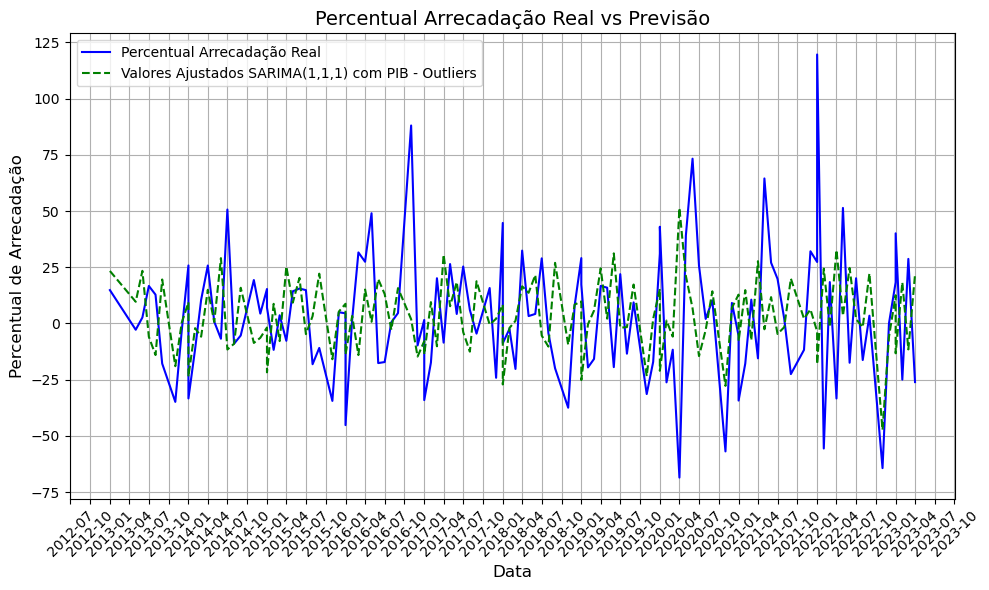

In [267]:

import matplotlib.dates as mdates
merged_data["predicted"]=model.fittedvalues
# Ordenar o dataframe pela coluna 'data' antes de plotar
merged_data_sorted = merged_data.sort_values(by='data')

# Plotar a série percentual de arrecadação real e a previsão com os dados ordenados
plt.figure(figsize=(10, 6))
plt.plot(merged_data_sorted['data'], merged_data_sorted['percentual_arrecadacao'], label='Percentual Arrecadação Real', color='blue')
plt.plot(merged_data_sorted['data'],model.fittedvalues, color='green', label='Valores Ajustados SARIMA(1,1,1) com PIB - Outliers', linestyle='--')

# Título e labels
plt.title('Percentual Arrecadação Real vs Previsão', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Percentual de Arrecadação', fontsize=12)

# Adicionar legenda
plt.legend()

# Ajustar os rótulos do eixo x para mostrar apenas janeiro, abril, julho e outubro
locator = mdates.MonthLocator(bymonth=[1, 4, 7, 10])  # Mostrar apenas Jan, Abr, Jul, Out
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Ano-Mês


# Adicionar grid ao gráfico
plt.grid(True)

# Ajustar os rótulos do eixo x
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()